In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Dataset_A.csv')

# Exploratory Data Analysis (EDA) of the dataset.

In [4]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
19346,3478,02-04-2015,rolls/buns
19347,2295,28-12-2015,pip fruit
19348,1833,24-07-2015,dessert
19349,3307,03-03-2015,other vegetables


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19351 entries, 0 to 19350
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    19351 non-null  int64 
 1   Date             19351 non-null  object
 2   itemDescription  19351 non-null  object
dtypes: int64(1), object(2)
memory usage: 453.7+ KB


In [6]:
data.nunique()

Member_number      3873
Date                728
itemDescription     163
dtype: int64

This dataset has 728 unique values in 'Date'. So it is necessary to check the timeframe of this dataset. 

In [7]:
#number of items sold in each year
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Year'] = data['Date'].dt.year
data['Year'].value_counts()

2015    12351
2014     7000
Name: Year, dtype: int64

In [8]:
#number of itmes sold in each month in each year. 
data['Month'] = data['Date'].dt.month
data[['Year','Month']].value_counts()

Year  Month
2015  8        1137
      1        1093
      5        1086
      11       1076
      7        1058
      3        1029
      6        1020
      4        1008
      10       1000
      9         970
      2         951
      12        923
2014  5         616
      8         611
      10        610
      7         597
      6         597
      4         586
      1         579
      12        576
      9         576
      11        568
      2         546
      3         538
dtype: int64

This dataset has data collected in year 2014 and 2015. There are more items sold in year 2015 compared to 2014. 

This dataset also shows that that there are 3873 customer, and there are only 163 itemDescription, it would be a many-to-many relationship. 
Each row representing the item bought by the specific 'member_number', on specific 'Date". 

last two rows showing two items were bought by same customer on the same date, but there are recorded at each row by each item.

In [9]:
data.sort_values(by=['Member_number','Date']).head(5)

,Member_number,Date,itemDescription,Year,Month
13331,1000,2014-06-24,whole milk,2014,6
4843,1000,2015-03-15,sausage,2015,3
8395,1000,2015-03-15,whole milk,2015,3
1629,1000,2015-05-27,soda,2015,5
17778,1000,2015-05-27,pickled vegetables,2015,5


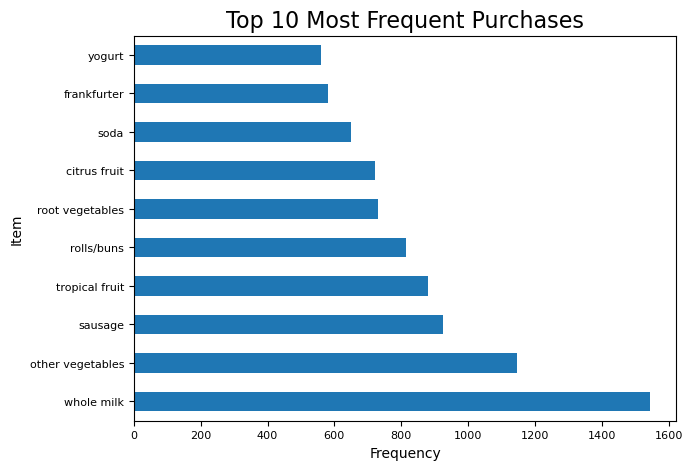

In [10]:
plt.figure(figsize=(7,5))
freq = data['itemDescription'].value_counts().head(10)
freq.plot(kind='barh')
plt.title('Top 10 Most Frequent Purchases', fontsize=16)
plt.xlabel('Frequency', fontsize=10)
plt.ylabel('Item', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# Preparation of the dataset.

In order to rearrange the dataset into 'each row representing each transaction', a new column named 'basket' is created that store the list of items that are grouped by 'Date' and 'Member_number'. 

In [11]:
group=data.groupby(['Date', 'Member_number'], 
                   axis=0)['itemDescription'].apply(list
                    ).reset_index(name='basket')
print(group.info())
group

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13971 entries, 0 to 13970
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           13971 non-null  datetime64[ns]
 1   Member_number  13971 non-null  int64         
 2   basket         13971 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 327.6+ KB
None


,Date,Member_number,basket
0,2014-01-01,1249,[citrus fruit]
1,2014-01-01,1381,[curd]
2,2014-01-01,1440,[other vegetables]
3,2014-01-01,1659,[specialty chocolate]
4,2014-01-01,1789,[hamburger meat]
...,...,...,...
13966,2015-12-30,3738,[onions]
13967,2015-12-30,3971,"[brown bread, bottled beer]"
13968,2015-12-30,4058,"[domestic eggs, cream cheese ]"
13969,2015-12-30,4565,"[canned beer, canned beer]"


Then, convert the dataset into a one-hot encoded pandas DataFrame. This encoded dataframe is ready to be imported into apriori function algorithm. 

In [12]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
encoded_data = encoder.fit(group['basket']).transform(group['basket'])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)
encoded_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13966,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Overview of the methodology.

## Find the support threshold

By knowing the number of rules generated from specific support threshold, it is easier to find out the support threshold to be used in the apriori function algorithm. Use loop to find all the number rules generated in each given support, support range(0.00005 to 0.01)

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

count_ms = []
count_len = []

def find_rule(msupp): 
    frequent_itemset_ap = apriori(encoded_df, min_support=msupp, use_colnames=True)
    rules = association_rules(frequent_itemset_ap, metric='lift', min_threshold=1)
    count_ms.append(msupp)
    count_len.append(len(rules))
    return rules
# Set the initial minimum support threshold
msupp = 0.00005

# Call the app() function with increasing values of msupp until a maximum value is reached
max_msupp = 0.01
while msupp <= max_msupp:
    find_rule(msupp)
    msupp += 0.00005


In [15]:
count_rules = pd.DataFrame({'min_supp':count_ms,
                            'num_of_rule':count_len})
count_rules[count_rules['num_of_rule']!=0]

,min_supp,num_of_rule
0,0.00005,22308
1,0.00010,1332
2,0.00015,424
3,0.00020,424
4,0.00025,168
5,0.00030,80
6,0.00035,80
7,0.00040,38
8,0.00045,20
9,0.00050,20


So, it is very easy to visualise. The higher the support ('min_supp'), the less number of rules generated ('num_of_rule'). 

# Result and Interpretation

## Generate rules based on the chosen support threshold

if we want to look for 10 rules from the apriori algorithm, then the respective support threshold would be 0.0006.
rules can be generated by substituting the support threshold (msupp) into the user defined function named find_rule(). 

In [27]:
def find_rule(msupp): 
    frequent_itemset_ap = apriori(encoded_df, min_support=msupp, use_colnames=True)
    rules = association_rules(frequent_itemset_ap, metric='confidence', min_threshold=0.05)
    count_ms.append(msupp)
    count_len.append(len(rules))
    return rules

In [28]:
rules_df = find_rule(0.0006)
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(whole milk),0.011238,0.108153,0.000716,0.063694,0.588930,-0.000500,0.952517,-0.413809
1,(beef),(whole milk),0.033570,0.108153,0.001861,0.055437,0.512582,-0.001770,0.944191,-0.495952
2,(berries),(other vegetables),0.016248,0.080739,0.001002,0.061674,0.763872,-0.000310,0.979682,-0.239096
3,(beverages),(sausage),0.010307,0.064634,0.000787,0.076389,1.181871,0.000121,1.012727,0.155486
4,(bottled beer),(rolls/buns),0.024050,0.057834,0.001360,0.056548,0.977756,-0.000031,0.998636,-0.022780
5,(bottled beer),(sausage),0.024050,0.064634,0.001360,0.056548,0.874891,-0.000194,0.991429,-0.127798
6,(bottled beer),(whole milk),0.024050,0.108153,0.001861,0.077381,0.715479,-0.000740,0.966648,-0.289502
7,(butter),(citrus fruit),0.015604,0.050891,0.001002,0.064220,1.261913,0.000208,1.014244,0.210842
8,(canned beer),(whole milk),0.031995,0.108153,0.001718,0.053691,0.496440,-0.001742,0.942449,-0.511687
9,(chicken),(whole milk),0.028702,0.108153,0.001789,0.062344,0.576446,-0.001315,0.951146,-0.430680


In [30]:
rules_df.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(butter),(citrus fruit),0.015604,0.050891,0.001002,0.064220,1.261913,0.000208,1.014244,0.210842
3,(beverages),(sausage),0.010307,0.064634,0.000787,0.076389,1.181871,0.000121,1.012727,0.155486
13,(curd),(sausage),0.015890,0.064634,0.001074,0.067568,1.045389,0.000047,1.003146,0.044120
18,(grapes),(whole milk),0.010164,0.108153,0.001145,0.112676,1.041825,0.000046,1.005098,0.040558
17,(grapes),(sausage),0.010164,0.064634,0.000644,0.063380,0.980605,-0.000013,0.998662,-0.019591
4,(bottled beer),(rolls/buns),0.024050,0.057834,0.001360,0.056548,0.977756,-0.000031,0.998636,-0.022780
26,(pastry),(rolls/buns),0.021473,0.057834,0.001145,0.053333,0.922178,-0.000097,0.995246,-0.079394
5,(bottled beer),(sausage),0.024050,0.064634,0.001360,0.056548,0.874891,-0.000194,0.991429,-0.127798
21,(meat),(other vegetables),0.017608,0.080739,0.001217,0.069106,0.855918,-0.000205,0.987503,-0.146287
20,(hamburger meat),(whole milk),0.020757,0.108153,0.001789,0.086207,0.797086,-0.000456,0.975984,-0.206328


In [181]:
#sort the rules by lift
rules_df.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(citrus fruit),(butter),0.050891,0.015604,0.001002,0.019691,1.261913,0.000208,1.004169,0.218681
5,(butter),(citrus fruit),0.015604,0.050891,0.001002,0.064220,1.261913,0.000208,1.014244,0.210842
2,(pork),(brown bread),0.037005,0.014029,0.000644,0.017408,1.240862,0.000125,1.003439,0.201567
3,(brown bread),(pork),0.014029,0.037005,0.000644,0.045918,1.240862,0.000125,1.009342,0.196870
0,(beverages),(sausage),0.010307,0.064634,0.000787,0.076389,1.181871,0.000121,1.012727,0.155486
1,(sausage),(beverages),0.064634,0.010307,0.000787,0.012182,1.181871,0.000121,1.001898,0.164517
6,(sausage),(curd),0.064634,0.015890,0.001074,0.016611,1.045389,0.000047,1.000733,0.046419
7,(curd),(sausage),0.015890,0.064634,0.001074,0.067568,1.045389,0.000047,1.003146,0.044120
8,(grapes),(whole milk),0.010164,0.108153,0.001145,0.112676,1.041825,0.000046,1.005098,0.040558
9,(whole milk),(grapes),0.108153,0.010164,0.001145,0.010589,1.041825,0.000046,1.000430,0.045014


In [182]:
#sort the rules by confidence
rules_df.sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(grapes),(whole milk),0.010164,0.108153,0.001145,0.112676,1.041825,0.000046,1.005098,0.040558
0,(beverages),(sausage),0.010307,0.064634,0.000787,0.076389,1.181871,0.000121,1.012727,0.155486
7,(curd),(sausage),0.015890,0.064634,0.001074,0.067568,1.045389,0.000047,1.003146,0.044120
5,(butter),(citrus fruit),0.015604,0.050891,0.001002,0.064220,1.261913,0.000208,1.014244,0.210842
3,(brown bread),(pork),0.014029,0.037005,0.000644,0.045918,1.240862,0.000125,1.009342,0.196870
4,(citrus fruit),(butter),0.050891,0.015604,0.001002,0.019691,1.261913,0.000208,1.004169,0.218681
2,(pork),(brown bread),0.037005,0.014029,0.000644,0.017408,1.240862,0.000125,1.003439,0.201567
6,(sausage),(curd),0.064634,0.015890,0.001074,0.016611,1.045389,0.000047,1.000733,0.046419
1,(sausage),(beverages),0.064634,0.010307,0.000787,0.012182,1.181871,0.000121,1.001898,0.164517
9,(whole milk),(grapes),0.108153,0.010164,0.001145,0.010589,1.041825,0.000046,1.000430,0.045014


In [183]:
#sort the rules by support
rules_df.sort_values(by=['support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(grapes),(whole milk),0.010164,0.108153,0.001145,0.112676,1.041825,0.000046,1.005098,0.040558
9,(whole milk),(grapes),0.108153,0.010164,0.001145,0.010589,1.041825,0.000046,1.000430,0.045014
6,(sausage),(curd),0.064634,0.015890,0.001074,0.016611,1.045389,0.000047,1.000733,0.046419
7,(curd),(sausage),0.015890,0.064634,0.001074,0.067568,1.045389,0.000047,1.003146,0.044120
4,(citrus fruit),(butter),0.050891,0.015604,0.001002,0.019691,1.261913,0.000208,1.004169,0.218681
5,(butter),(citrus fruit),0.015604,0.050891,0.001002,0.064220,1.261913,0.000208,1.014244,0.210842
0,(beverages),(sausage),0.010307,0.064634,0.000787,0.076389,1.181871,0.000121,1.012727,0.155486
1,(sausage),(beverages),0.064634,0.010307,0.000787,0.012182,1.181871,0.000121,1.001898,0.164517
2,(pork),(brown bread),0.037005,0.014029,0.000644,0.017408,1.240862,0.000125,1.003439,0.201567
3,(brown bread),(pork),0.014029,0.037005,0.000644,0.045918,1.240862,0.000125,1.009342,0.196870


## Plotting the graph to visualize the significance of rules with respect to lift, confidence, and support

     Plot the scatter plot of 
         1. lift vs confidence
         2. lift vs support
         3. support vs confidence

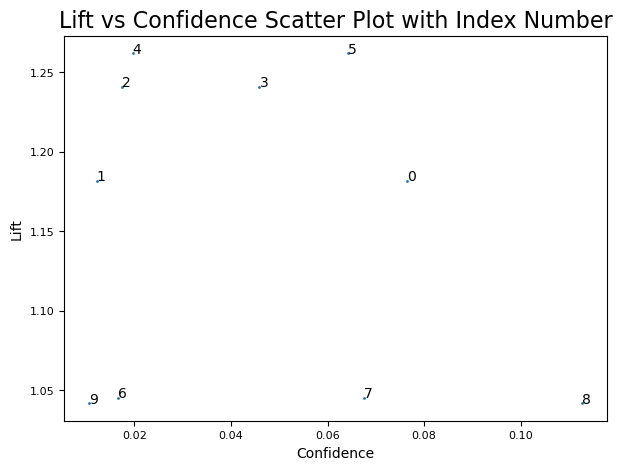

In [226]:
import matplotlib.pyplot as plt
# Plot the scatter plot of lift vs confidence
plt.figure(figsize=(7, 5))
plt.scatter(rules_df['confidence'], rules_df['lift'], s=1)

# Add index number as label to each point
for i, row in rules_df.iterrows():
    plt.annotate(i, (row['confidence'], row['lift']), fontsize=10)

# Set the labels and title of the plot
plt.xlabel('Confidence', fontsize=10)
plt.ylabel('Lift', fontsize=10)
plt.title('Lift vs Confidence Scatter Plot with Index Number', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

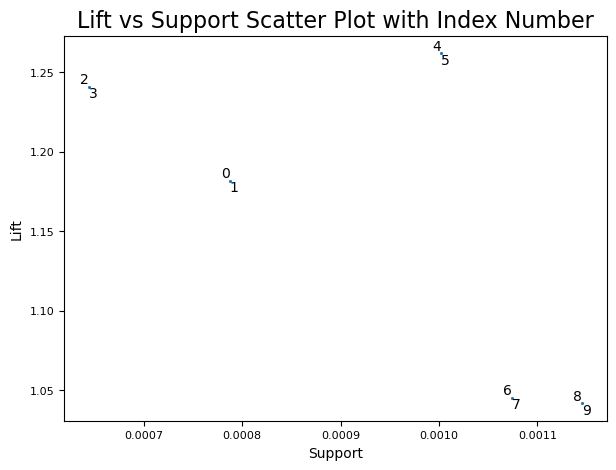

In [227]:
plt.figure(figsize=(7,5))
plt.scatter(rules_df['support'], rules_df['lift'], s=1)

for i, txt in enumerate(rules_df.index):
    if i % 2 == 0:
        plt.annotate(txt, (rules_df.support[i], rules_df.lift[i]), fontsize=10, ha='right', va='bottom')
    else:
        plt.annotate(txt, (rules_df.support[i], rules_df.lift[i]), fontsize=10, ha='left', va='top')

plt.xlabel('Support', fontsize=10)
plt.ylabel('Lift', fontsize=10)
plt.title('Lift vs Support Scatter Plot with Index Number', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

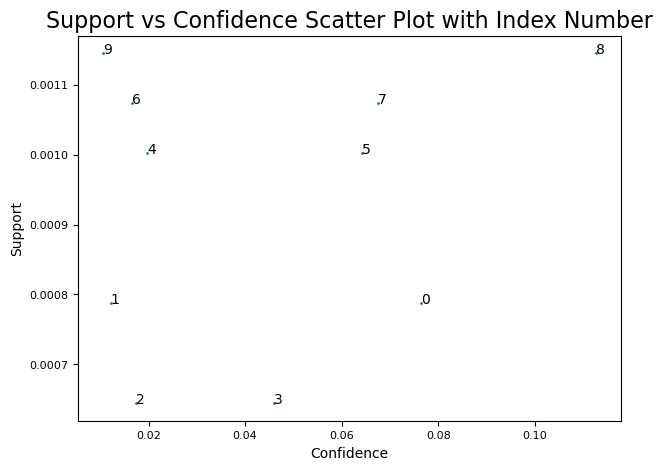

In [228]:
plt.figure(figsize=(7, 5))
plt.scatter(rules_df['confidence'], rules_df['support'], s=1)

for i, row in rules_df.iterrows():
    plt.annotate(i, (row['confidence'], row['support']), fontsize=10)

plt.xlabel('Confidence', fontsize=10)
plt.ylabel('Support', fontsize=10)
plt.title('Support vs Confidence Scatter Plot with Index Number', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Below shows the rules recommended by graph approach.

In [215]:
rules_df.iloc[[0,4,5,7,8]]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beverages),(sausage),0.010307,0.064634,0.000787,0.076389,1.181871,0.000121,1.012727,0.155486
4,(citrus fruit),(butter),0.050891,0.015604,0.001002,0.019691,1.261913,0.000208,1.004169,0.218681
5,(butter),(citrus fruit),0.015604,0.050891,0.001002,0.064220,1.261913,0.000208,1.014244,0.210842
7,(curd),(sausage),0.015890,0.064634,0.001074,0.067568,1.045389,0.000047,1.003146,0.044120
8,(grapes),(whole milk),0.010164,0.108153,0.001145,0.112676,1.041825,0.000046,1.005098,0.040558
